In [1]:
# coding=utf-8
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
from IPython.display import display, HTML

HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:0.5em;
margin-bottom:0.5em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.0em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: "Times New Roman", Times, serif;
font-size:1.3em;
line-height:1.5em;
padding-left:1em;
padding-right:1em;
}
</style>
""")

In [2]:
data_type = {"sexo": str,
             "ind_nuevo": str,
             "ult_fec_cli_1t": str,
             "indext": str}

In [3]:
# Read cleaned data file
df = pd.read_csv("train_final.csv", dtype=data_type)

/Users/amitrajan/Desktop/PythonVirtualEnvs/MLProject/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
pd.set_option('display.max_columns', None)
df.head(20)
# Add total number of product as a new column
df["total_products"] = df.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
df["total_products"] = pd.to_numeric(df["total_products"], errors="coerce")

aa = df.groupby('fecha_dato')['total_products'].sum()

Another interesting analysis can be done based on the Province. The total number of customers based on the province and the distribution of product counts based on the province is shown below. While analyzing the customer/product distributuon based on province, provinces having overall share of less than 1% are discarded. It is to be noted that the number of customers and the products sold in a province are highly correlated. Province with code 28 has highest number of customer/product share followed by province with code 11.

The analysis is done based on the effect of channel used by the customer to join on the customer count and the product count. The channels which contributed less than 1% towards the customer/product count are combined as one with the code 999. It is to be noted that the channels with codes 1,4 and 5 have major contribution in customer and product count but they have a clear imbalance in the product to customer percentage ratio. Channel 4 and 5 have higher percentage for the product count relative to the customer count while channel 1 has significantly lower value for the percentage of product count relative to the customer count.

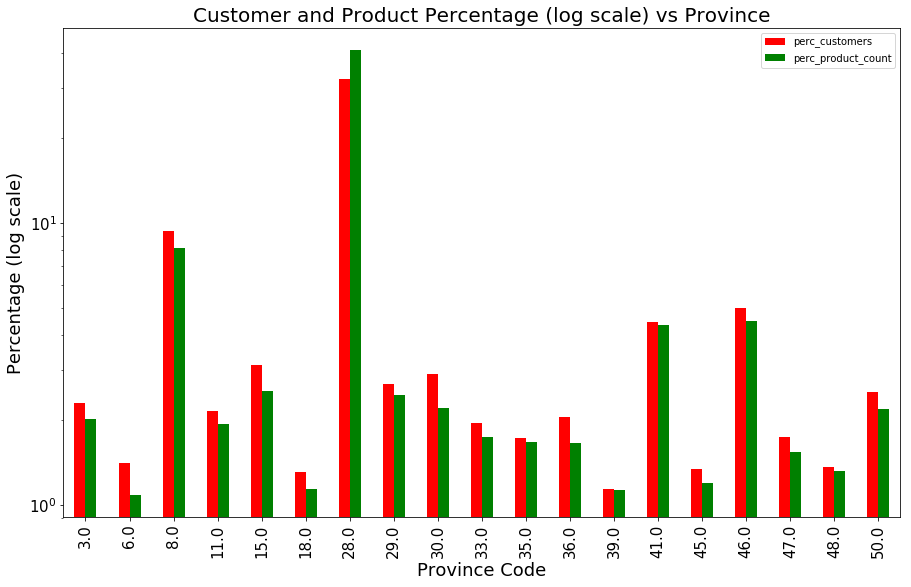

In [133]:
temp_prov_count = df[['ncodpers', 'cod_prov']].groupby('cod_prov').count()
temp_prov_product_count = pd.DataFrame(df.groupby('cod_prov')['total_products'].sum())

temp = temp_prov_count.join(temp_prov_product_count)
temp['perc_customers'] = (temp['ncodpers'] / temp['ncodpers'].sum()) *100
temp['perc_product_count'] = (temp['total_products'] / temp['total_products'].sum()) *100
temp = temp.drop('ncodpers', axis=1)
temp = temp.drop('total_products', axis=1)
temp = temp.loc[(temp['perc_customers'] >= 1.0) & (temp['perc_product_count'] >= 1.0)]
temp.head(60)

%matplotlib inline
plt.figure()
axes = temp.plot(y=["perc_customers", "perc_product_count"], colors=['Red','Green'], kind="bar", logy=True
         , figsize=(15, 9), fontsize=15)
axes.set_ylabel("Percentage (log scale)", fontsize=18)
axes.set_xlabel("Province Code", fontsize=18)
axes.set_title("Customer and Product Percentage (log scale) vs Province", fontsize=20)
plt.savefig("Distribution by Province.png")
plt.show()
plt.close()

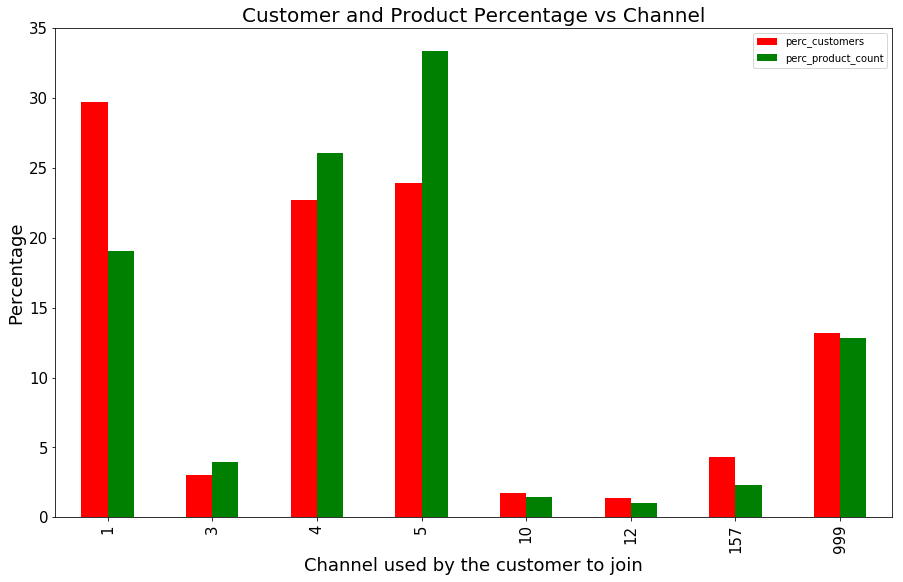

In [134]:
# Analysis of canal_entrada (channel used by the customer to join)
temp_canal_entrada_count = df[['ncodpers', 'canal_entrada']].groupby('canal_entrada').count()
temp_canal_entrada_product_count = pd.DataFrame(df.groupby('canal_entrada')['total_products'].sum())

temp = temp_canal_entrada_count.join(temp_canal_entrada_product_count)
temp['perc_customers'] = (temp['ncodpers'] / temp['ncodpers'].sum()) *100
temp['perc_product_count'] = (temp['total_products'] / temp['total_products'].sum()) *100
temp = temp.drop('ncodpers', axis=1)
temp = temp.drop('total_products', axis=1)
temp = temp.loc[(temp['perc_customers'] >= 1.0) & (temp['perc_product_count'] >= 1.0)]
# Add a row in the dataframe for the rest of the channels (Percentage for the rest of the channels)
temp.loc[999] = [100 - temp['perc_customers'].sum(), 100 - temp['perc_product_count'].sum()]

%matplotlib inline
plt.figure()
axes = temp.plot(y=["perc_customers", "perc_product_count"], colors=['Red','Green'], kind="bar",
        figsize=(15, 9), fontsize=15)
axes.set_ylabel("Percentage", fontsize=18)
axes.set_xlabel("Channel used by the customer to join", fontsize=18)
axes.set_title("Customer and Product Percentage vs Channel", fontsize=20)
plt.savefig("Distribution by Channel.png")
plt.show()
plt.close()

The analysis of customer and product statistic based on customer segment is done. The customers whose segment is <b>Unknown</b> have the lowest count. It is to be noted that the <b>VIP</b> customers contribute around 12% of the total product sold which is three times of their population percentage. The fresh <b>college graduated</b> customers are around 36% percent of the total population but their contribution in the total product count is around 25%. They are the ideal candidate for the potential buyers for the products.

          perc_customers  perc_product_count
segmento                                    
1               4.119068           11.594682
2              58.328129           63.027413
3              36.165218           24.826895
4               1.387585            0.551009


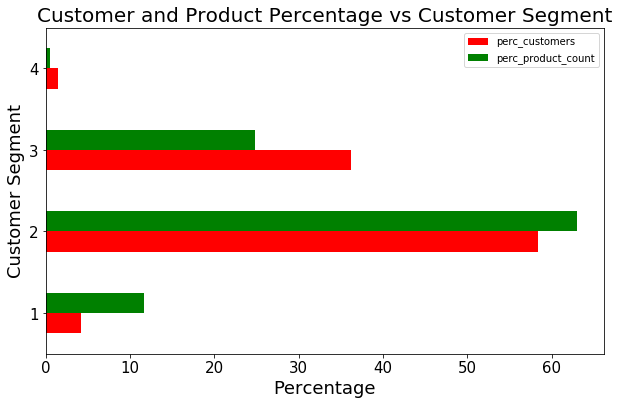

In [139]:
df[['ncodpers', 'segmento']].groupby('segmento').count()
temp_segmento_count = df[['ncodpers', 'segmento']].groupby('segmento').count()
temp_segmento_product_count = df.groupby('segmento')['total_products'].sum()
temp = temp_segmento_count.join(temp_segmento_product_count)

temp['perc_customers'] = (temp['ncodpers'] / temp['ncodpers'].sum()) *100
temp['perc_product_count'] = (temp['total_products'] / temp['total_products'].sum()) *100
temp = temp.drop('ncodpers', axis=1)
temp = temp.drop('total_products', axis=1)

print temp.head()

%matplotlib inline
plt.figure()
axes = temp.plot(y=["perc_customers", "perc_product_count"], colors=['Red','Green'], kind="barh",
                     figsize=(10, 6), fontsize=15)
axes.set_ylabel("Customer Segment", fontsize=18)
axes.set_xlabel("Percentage", fontsize=18)
axes.set_title("Customer and Product Percentage vs Customer Segment", fontsize=20)
plt.savefig("Distribution by Customer Segment.png")
plt.show()
plt.close()

<h4> Month wise detailed analysis : </h4>
Text

In [214]:
print df['fecha_dato'].unique()
column_list = ['ncodpers', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
               'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
               'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
               'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
               'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

change_absolute_product_count = {}
count_product_added = {}

['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']


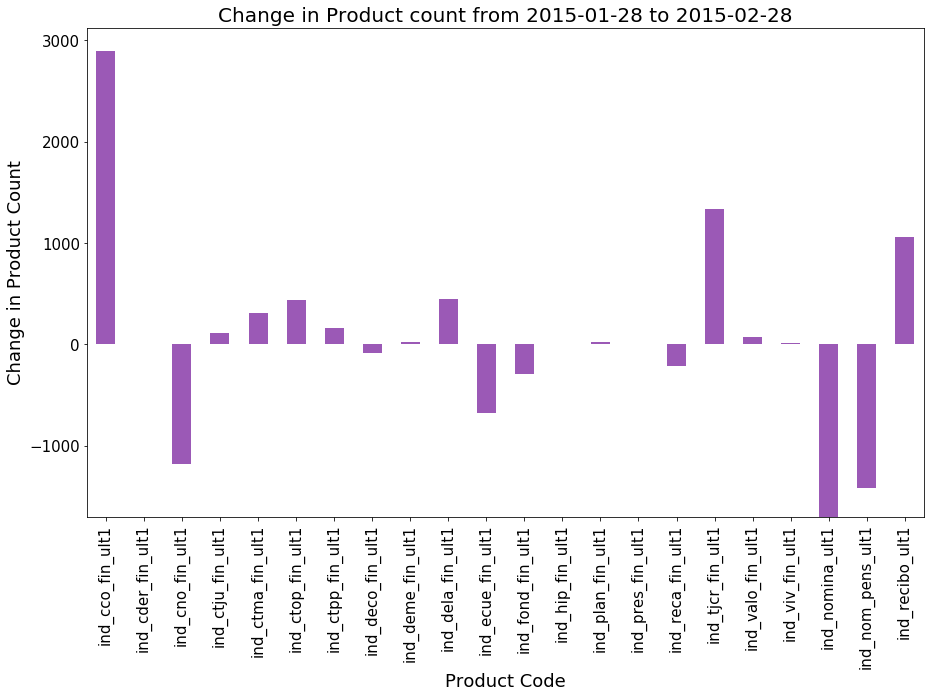

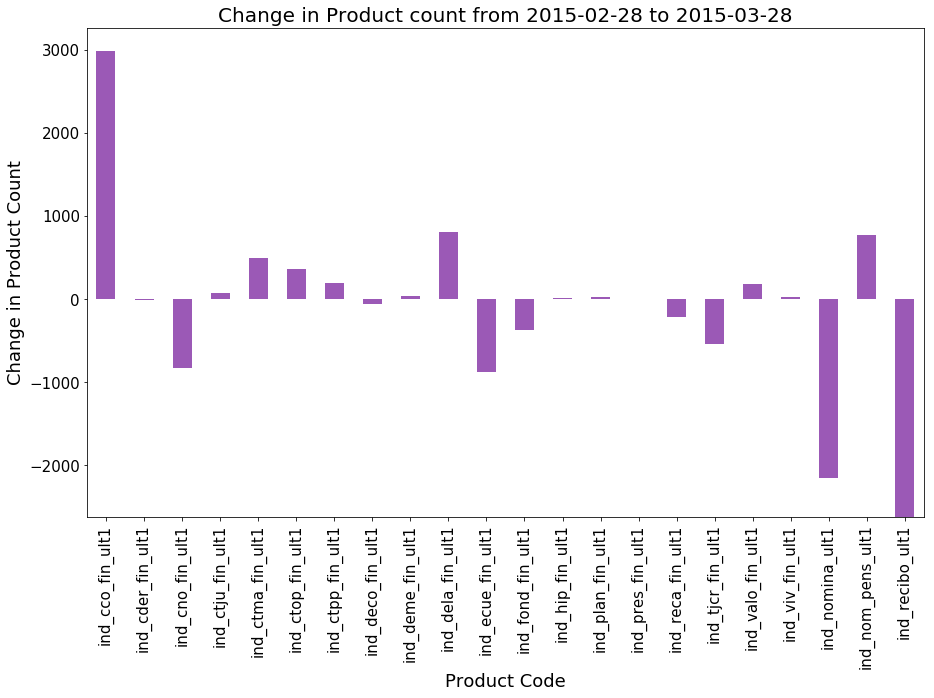

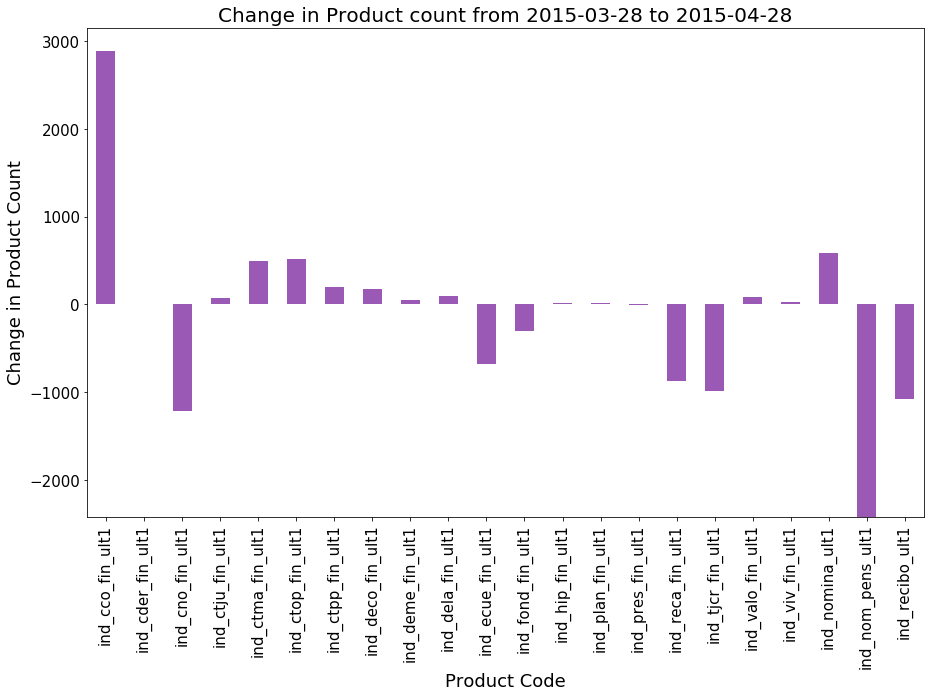

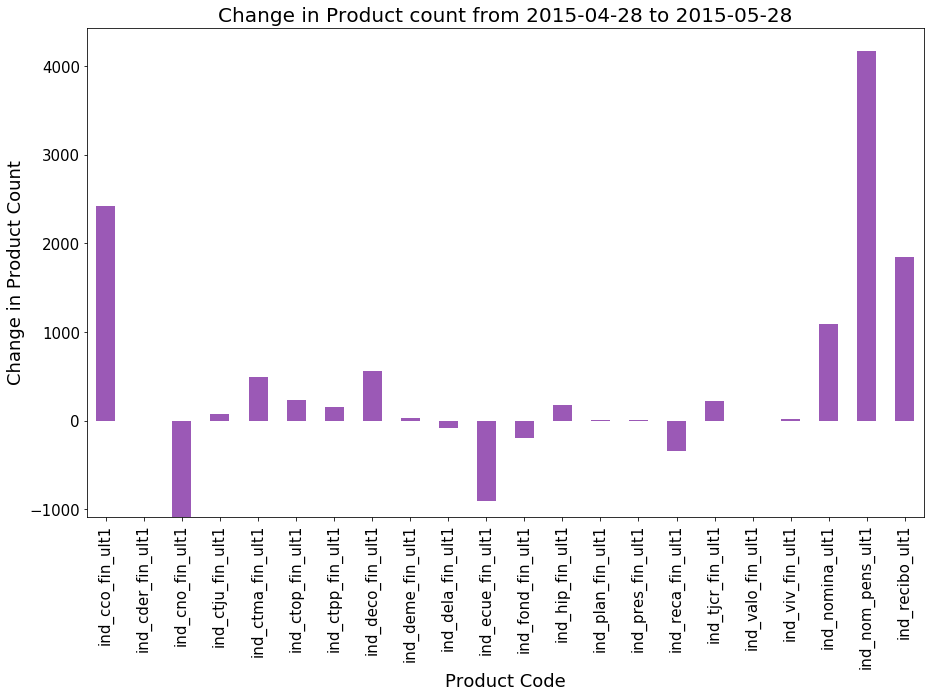

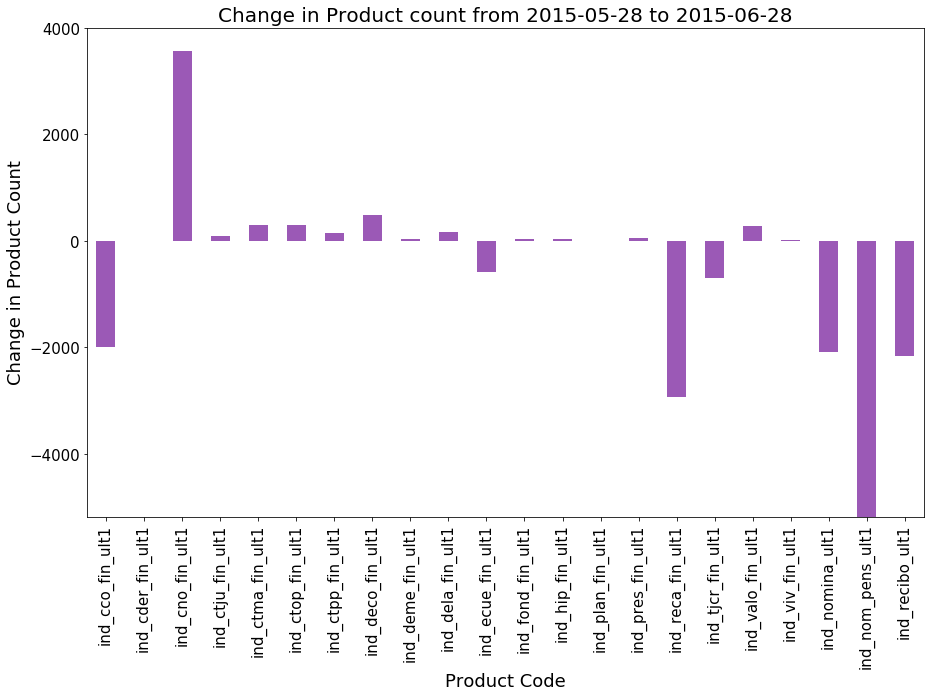

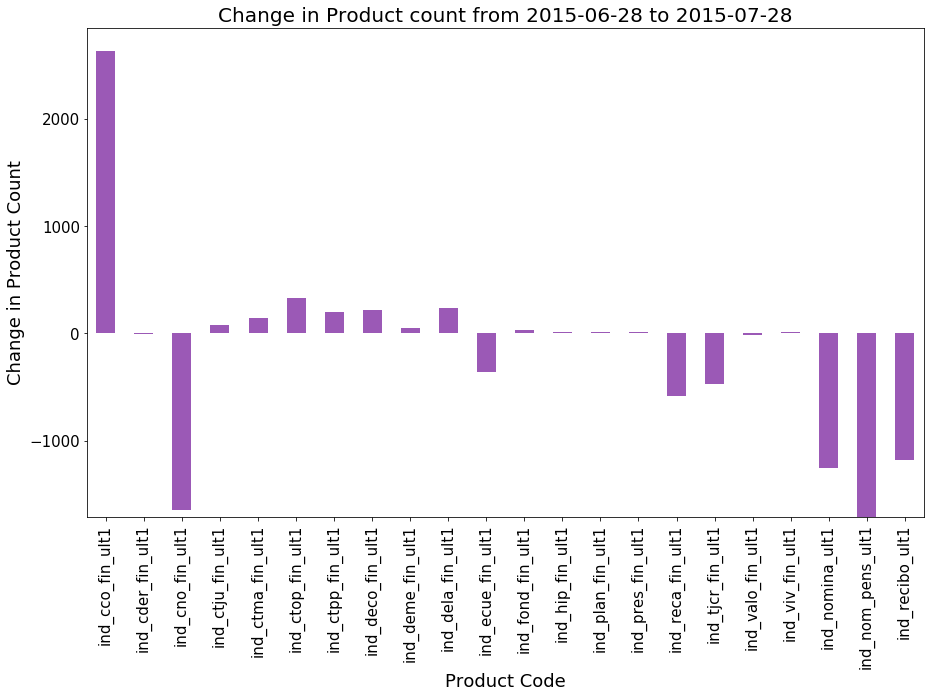

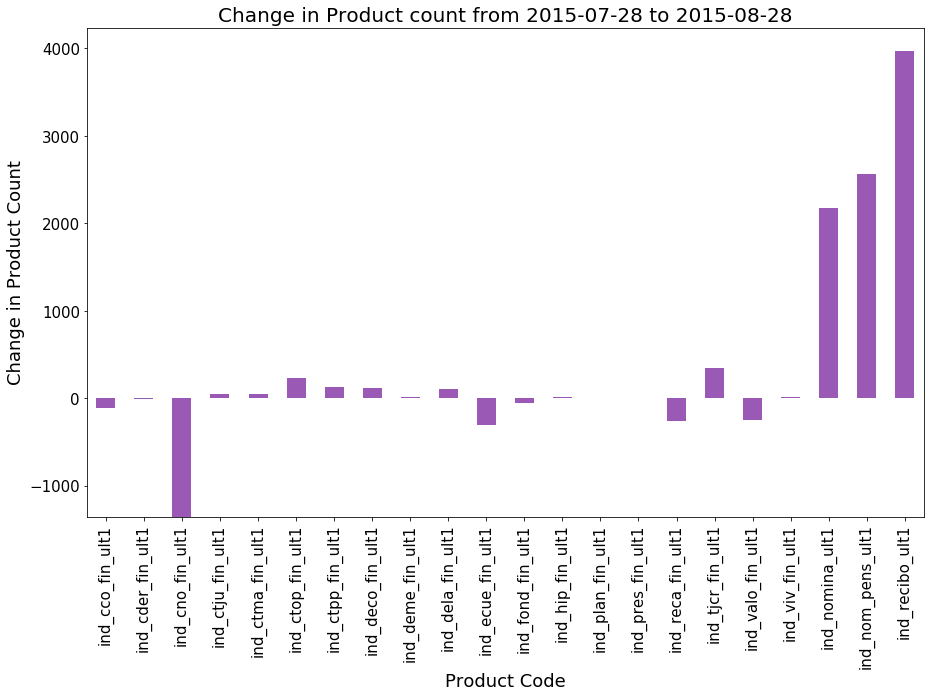

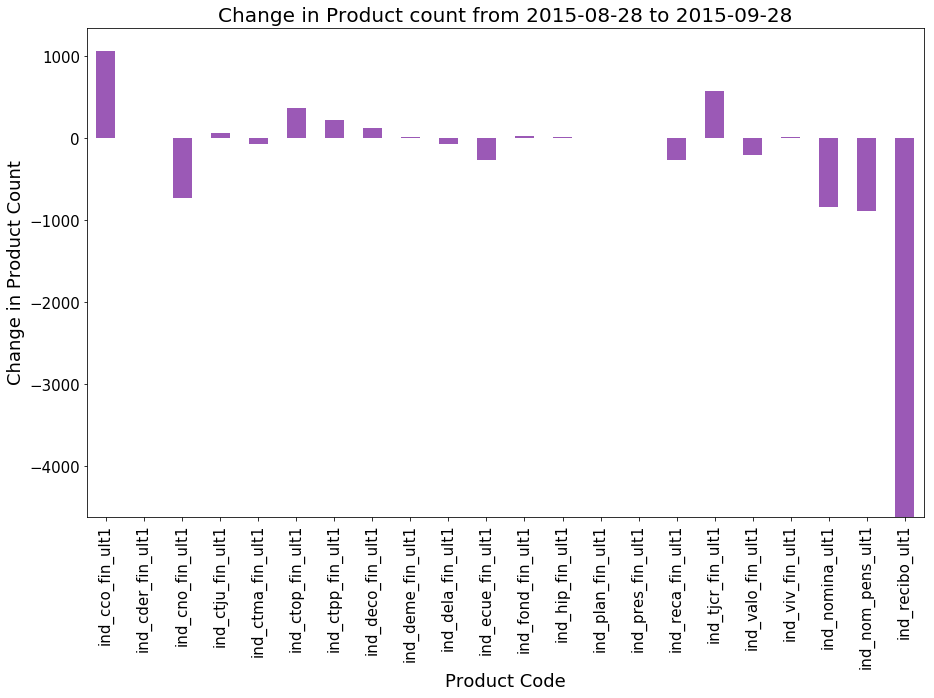

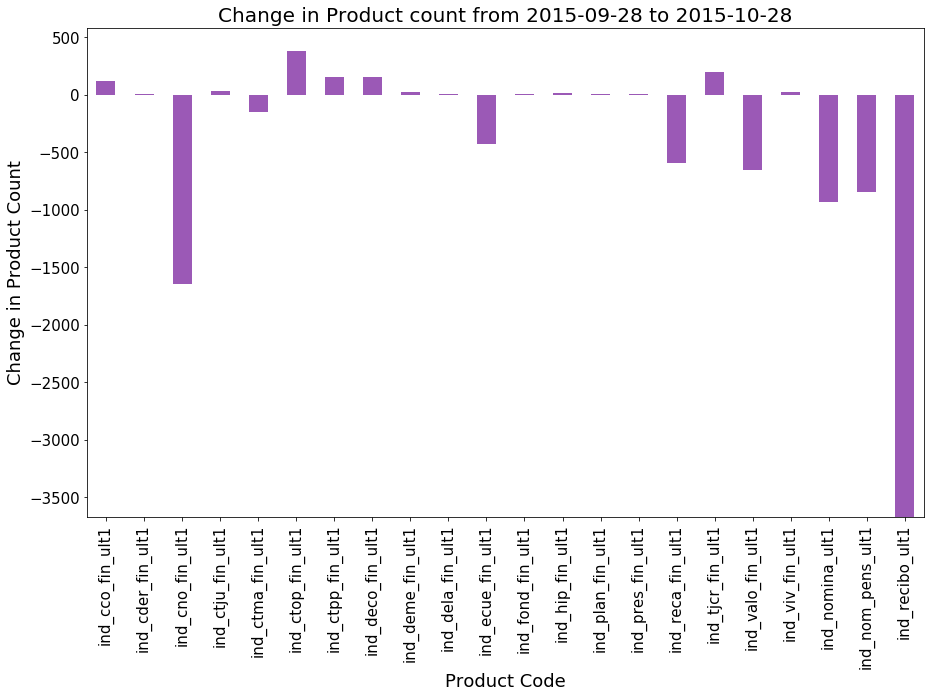

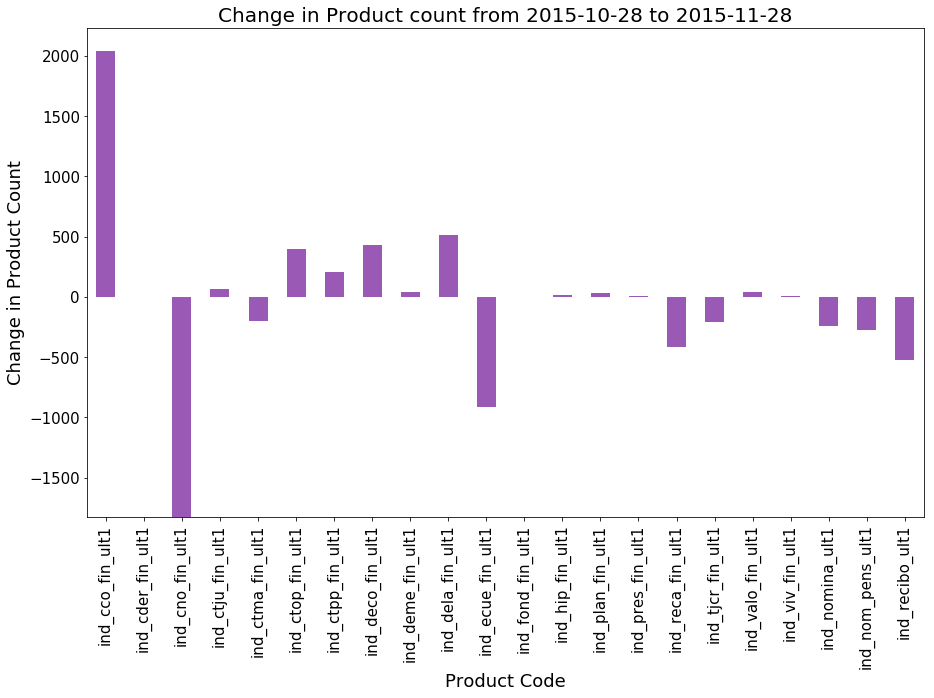

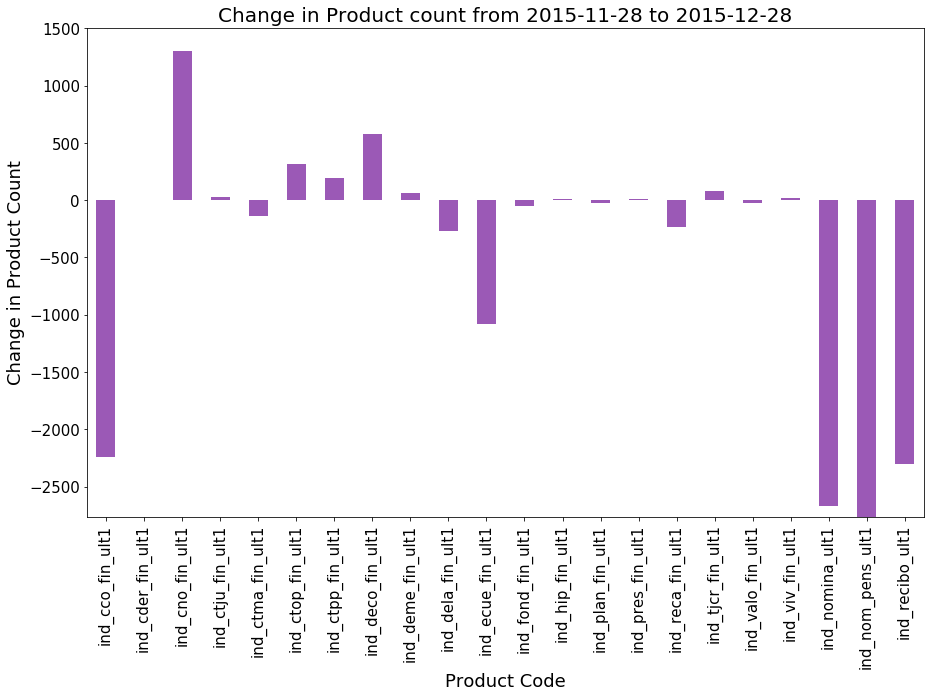

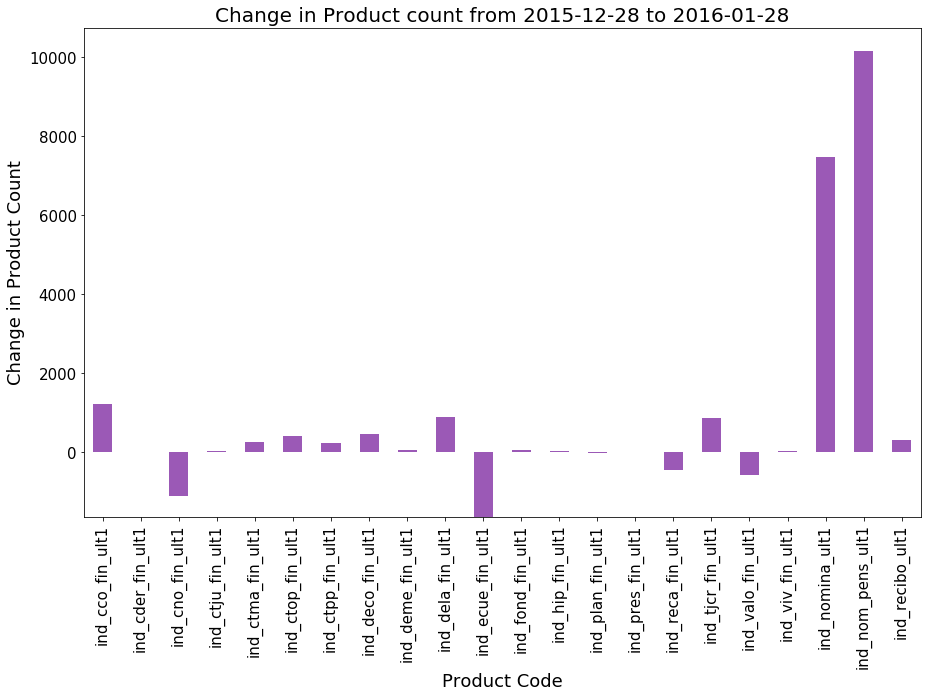

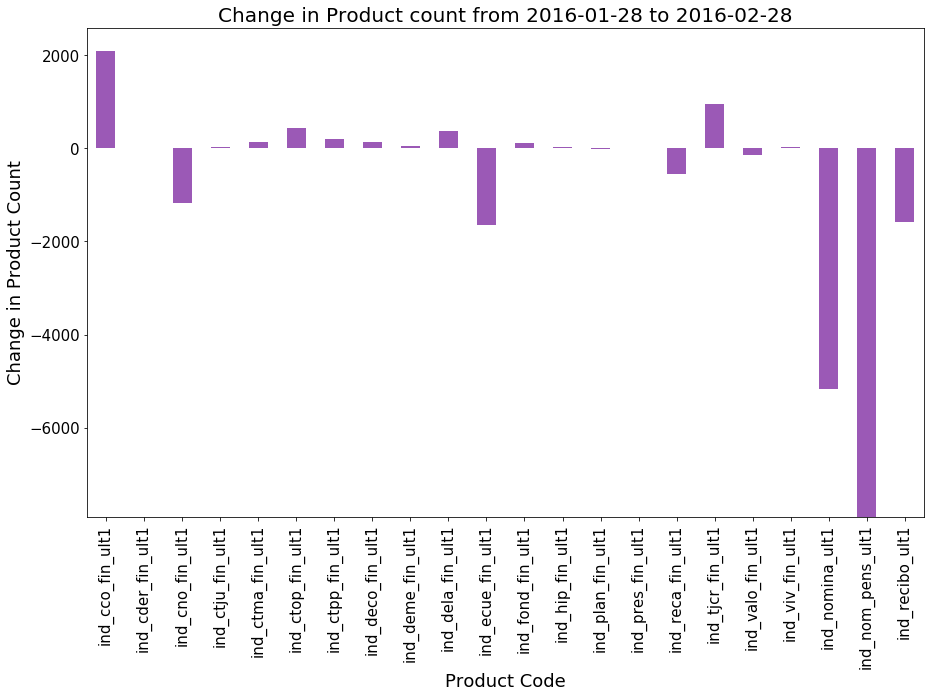

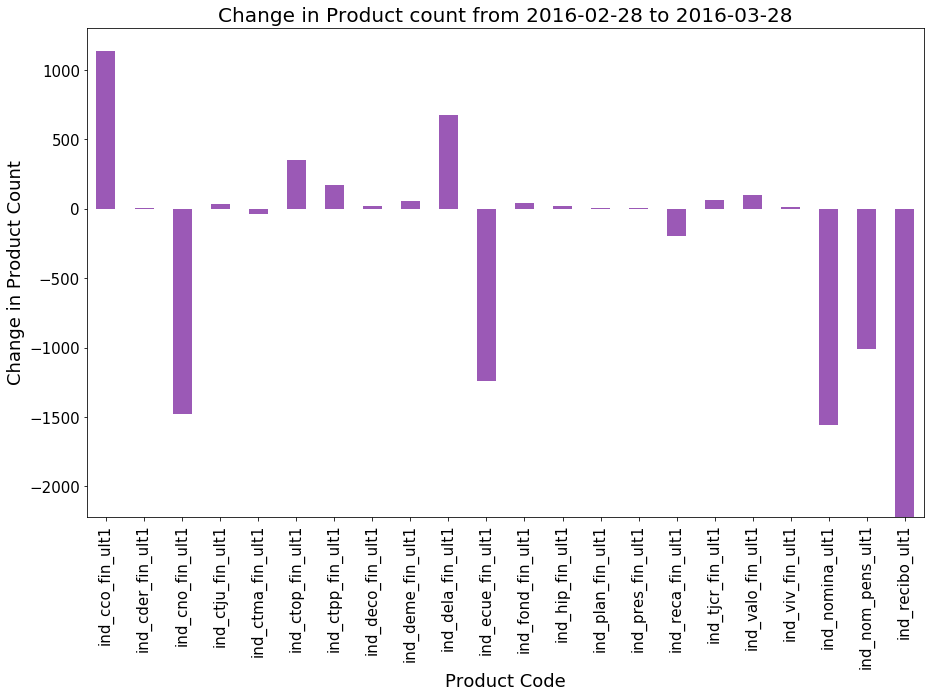

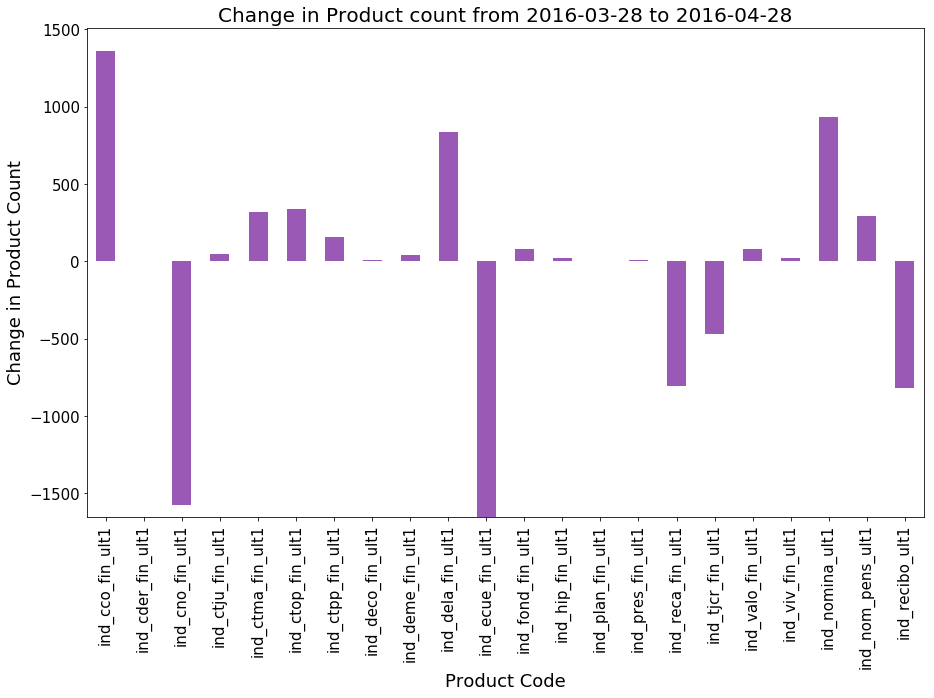

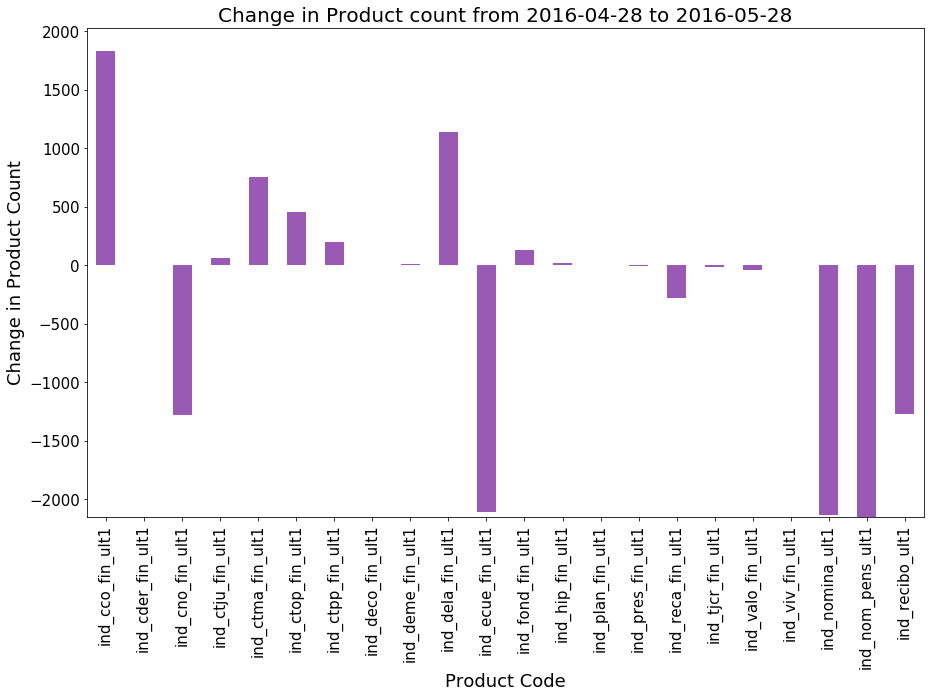

In [215]:
month_list = df['fecha_dato'].unique()
for index, months in enumerate(month_list):
    if index < 16:
        month_1 = month_list[index]
        month_2 = month_list[index+1]
        df_month_previous = df.loc[df['fecha_dato'] == month_1][column_list]
        df_month_next = df.loc[df['fecha_dato'] == month_2][column_list]

        df_month_previous = df_month_previous[df_month_previous['ncodpers'].isin(df_month_next['ncodpers'])]
        df_month_next = df_month_next[df_month_next['ncodpers'].isin(df_month_previous['ncodpers'])]

        df_month_previous.set_index('ncodpers', inplace=True)
        df_month_next.set_index('ncodpers', inplace=True)

        temp = df_month_previous - df_month_next
        final = temp.sum(axis=0)
    
        %matplotlib inline
        plt.figure()
        axes = final.plot(kind='bar', figsize=(15, 9), fontsize=15, colors=['#9B59B6'])
        axes.set_ylabel("Change in Product Count", fontsize=18)
        axes.set_xlabel("Product Code", fontsize=18)
        axes.set_title("Change in Product count from " + month_1 + " to " + month_2, fontsize=20)
        plt.savefig("Change in Product count from " + month_1 + " to " + month_2 + ".png")
        plt.show()
        plt.close()
        
        change_product_count[index+1] = final.abs().sum()
        count_product_added[index+1] = final[final > 0].sum()

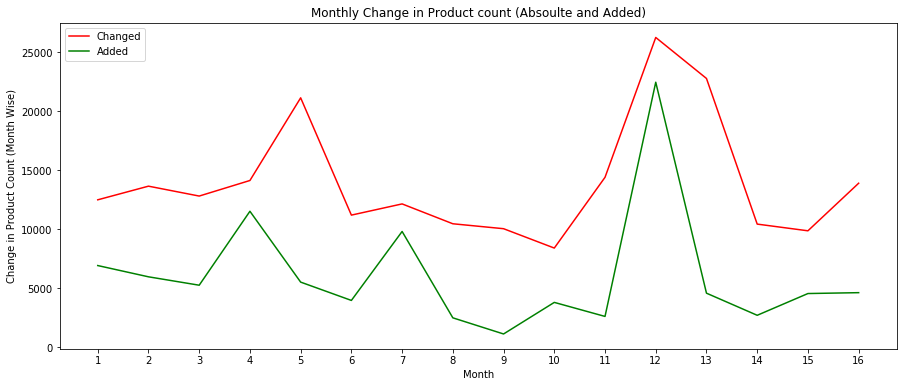

In [239]:
list_change = sorted(change_product_count.items())
list_added = sorted(count_product_added.items())

x1, y1 = zip(*list_change)
x2, y2 = zip(*list_added)

plt.figure(figsize=(15,6))
plt.gca().set_color_cycle(['red', 'green'])
plt.plot(x1, y1)
plt.plot(x2, y2)

plt.xticks(x1)
plt.legend(['Changed', 'Added'], loc='upper left')
plt.xlabel("Month")
plt.ylabel("Change in Product Count (Month Wise)")
plt.title("Monthly Change in Product count (Absoulte and Added)")
plt.savefig("Monthly Change in Product count")
plt.show()
plt.close()